In [2]:
import networkx as nx
import matplotlib.pyplot as plt

language_codes = {
    'enwiki': 'English',
    'eswiki': 'Spanish',
    'frwiki': 'French',
    'dewiki': 'German',
    'itwiki': 'Italian',
    'nlwiki': 'Dutch',
    'ptwiki': 'Portuguese',
    'ruwiki': 'Russian',
    'zhwiki': 'Chinese',
    'plwiki': 'Polish',
    'jawiki': 'Japanese',
    'arwiki': 'Arabic',
    'trwiki': 'Turkish',
    'fawiki': 'Persian',
    'svwiki': 'Swedish',
    'ukwiki': 'Ukraine',
    'hewiki': 'Hebrew',
    'cawiki': 'Catalan',
    'fiwiki': 'Finnish',
    'nowiki': 'Norwegian'
}

edit_languages = [
    "enwiki;eswiki;warwiki;brwiki;ocwiki;mswiki;svwiki;zhwiki;lawiki;arwiki;idwiki;cswiki;pcdwiki",
    "frwiki;brwiki",
    "dewiki;nlwiki",
    "frwiki;enwiki;ocwiki;eswiki;brwiki;warwiki;mswiki;svwiki;zhwiki;lawiki;arwiki;idwiki;pcdwiki;sqwiki;dewiki;cswiki;lbwiki",
    "enwiki;zhwiki;euwiki;tgwiki;frwiki;plwiki",
    "nlwiki;enwiki;liwiki;frwiki",
    "dewiki;ruwiki",
    "enwiki;swwiki;itwiki;elwiki",
    "enwiki;zhwiki;euwiki",
    "frwiki;dewiki;eowiki;ruwiki"
]


In [3]:
def find_isolated_nodes(language_codes, edit_languages):
    G = nx.Graph()
    G.add_nodes_from(language_codes.values())
    for line in edit_languages:
        languages = line.split(';')
        for i in range(len(languages)):
            for j in range(i + 1, len(languages)):
                if languages[i] in language_codes and languages[j] in language_codes:
                    if G.has_edge(language_codes[languages[i]], language_codes[languages[j]]):
                        G[language_codes[languages[i]]][language_codes[languages[j]]]['weight'] += 1
                    else:
                        G.add_edge(language_codes[languages[i]], language_codes[languages[j]], weight=1)
    isolated_nodes = [node for node, degree in G.degree() if degree == 0]
    return isolated_nodes, G


In [4]:
from collections import defaultdict

edge_weights = defaultdict(int)

for line in edit_languages:
    languages = line.split(';')
    for i in range(len(languages)):
        for j in range(i + 1, len(languages)):
            edge_weights[(languages[i], languages[j])] += 1

valid_edge_weights = {k: v for k, v in edge_weights.items() if k[0] in language_codes and k[1] in language_codes}

valid_edge_weights


{('enwiki', 'eswiki'): 2,
 ('enwiki', 'svwiki'): 2,
 ('enwiki', 'zhwiki'): 4,
 ('enwiki', 'arwiki'): 2,
 ('eswiki', 'svwiki'): 2,
 ('eswiki', 'zhwiki'): 2,
 ('eswiki', 'arwiki'): 2,
 ('svwiki', 'zhwiki'): 2,
 ('svwiki', 'arwiki'): 2,
 ('zhwiki', 'arwiki'): 2,
 ('dewiki', 'nlwiki'): 1,
 ('frwiki', 'enwiki'): 1,
 ('frwiki', 'eswiki'): 1,
 ('frwiki', 'svwiki'): 1,
 ('frwiki', 'zhwiki'): 1,
 ('frwiki', 'arwiki'): 1,
 ('frwiki', 'dewiki'): 2,
 ('enwiki', 'dewiki'): 1,
 ('eswiki', 'dewiki'): 1,
 ('svwiki', 'dewiki'): 1,
 ('zhwiki', 'dewiki'): 1,
 ('arwiki', 'dewiki'): 1,
 ('enwiki', 'frwiki'): 2,
 ('enwiki', 'plwiki'): 1,
 ('zhwiki', 'frwiki'): 1,
 ('zhwiki', 'plwiki'): 1,
 ('frwiki', 'plwiki'): 1,
 ('nlwiki', 'enwiki'): 1,
 ('nlwiki', 'frwiki'): 1,
 ('dewiki', 'ruwiki'): 2,
 ('enwiki', 'itwiki'): 1,
 ('frwiki', 'ruwiki'): 1}

In [5]:
def plot_language_graph(language_codes, edit_languages):
    isolated_nodes, G = find_isolated_nodes(language_codes, edit_languages)
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2.5)
    nx.draw(G, pos, with_labels=True, node_size=4000, font_size=15, node_color='lightblue', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if isolated_nodes:
        text = "- Isolated Nodes -\n\n"
        for node in isolated_nodes:
            text += f"* {node}\n"
        plt.text(1.2, 0.5, text, fontsize=12, transform=plt.gca().transAxes)
    plt.title("Wikipedia Language Co-occurrence Graph")
    plt.show()


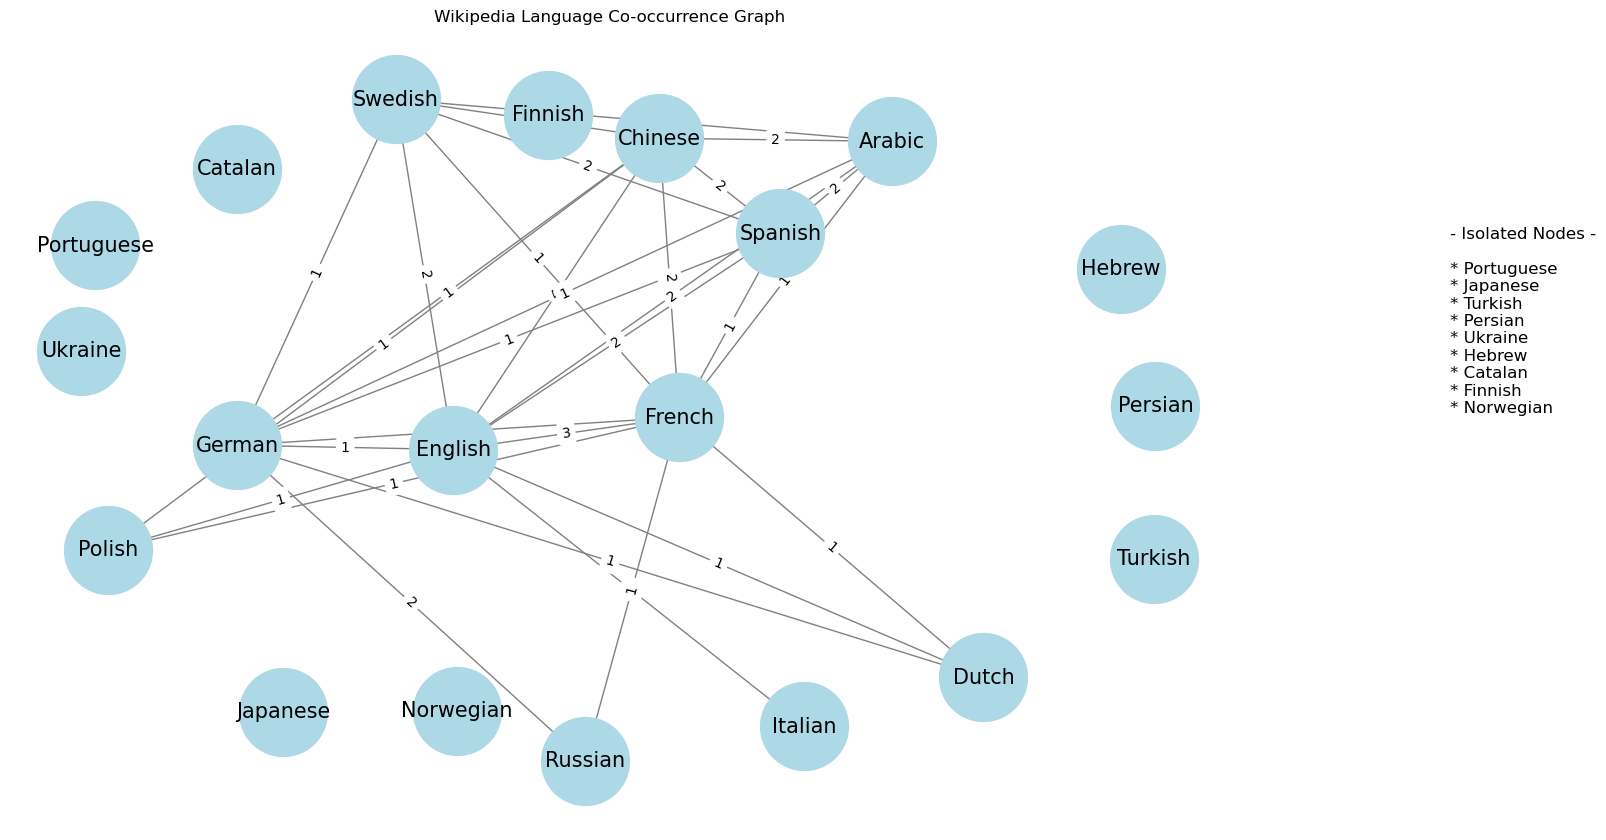

In [7]:
plot_language_graph(language_codes, edit_languages)